# 🐼 Pandas for working with collections data

The aim of this notebook is to show that based on concepts we have seen in previous notebooks we can already do quite a lot. It might not be possible to follow every step but you should see parallels with what we've already seen.  

We will use the [newspaper title list](https://bl.iro.bl.uk/work/7da47fac-a759-49e2-a95a-26d49004eba8) as our example. 

In [96]:
import requests

## Pandas? 

Pandas is a tool for working with tabular data in Python. 

### Why Pandas?
Why work with tabular data in Python pandas and not in excel? 
### Why not Pandas?
Are there reasons we might not work with Pandas? 

## Downloading our data

First thing we'll need to do is find a link we can use to download our data. 

https://bl.iro.bl.uk/work/7da47fac-a759-49e2-a95a-26d49004eba8


In [99]:
url = 'https://bl.oar.bl.uk/fail_uploads/download_file?fileset_id=67b25f41-a682-4c1f-bf42-550e06b48244'
r = requests.get(url)
r

<Response [200]>

# Saving 

We now need to save the response file. We'll do this slightly differently to last time using ```with```. This is a common pattern in Python but we won't spend to much time worrying about why this is better than our previous version now. 

In [100]:
with open('title_list.zip', 'wb') as f:
    f.write(r.content)

# How to unzip?

We now have a zip file. How could we unzip this? We could look for a python library for doing this. An alternative option we have in a notebook environment is to use bash commands. We can run these by using ```!``` in front of the bash command. Sometimes there is a tool in bash which makes something very quick and we may want to just this. 

In [ ]:
!ls

## Unzip 

In [102]:
!unzip title_list.zip

Archive:  title_list.zip
  inflating: BritishAndIrishNewspapers_18112019_README.txt  
  inflating: BritishAndIrishNewspapersTitleList_20191118.csv  


We can us ```ls``` to check what changed 

In [ ]:
!ls

We can use ```head``` to preview our data 

In [ ]:
!head -n 5 BritishAndIrishNewspapersTitleList_20191118.csv

# Opening our CSV in Python 
Now we have our CSV file how do we open this?

In [104]:
csv = 'BritishAndIrishNewspapersTitleList_20191118.csv'

We can try using ```open()``` and ```read()``` which we previously saw with text files. We'll use the indexing ```[]``` we saw previously to limit how much we see. 

In [106]:
open(csv).read()[:300]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 3189: invalid start byte

Whoops! Let's try a different encoding. This is something you will come across from time to time. This is one of the things which over time you'll become quicker in debugging. 

In [107]:
open(csv, encoding="latin-1").read()[:300]

'title_id,nid,nlp,publication_title,edition,preceding_titles,succeeding_titles,place_of_publication,country_of_publication,general_area_of_coverage,coverage_city,first_geographical_subject_heading,subsequent_geographical_subject_headings,first_date_held,last_date_held,publication_date_one,publication'

That seems to work! 

# Opening our CSV in Pandas 

Now let's try opening our csv in pandas. Some of this will look a bit different to things we've seen before but we'll build on what we've already seen. 


In [ ]:
import pandas as pd

We imported pandas as pd. This is something you'll see sometimes as a way of shortening package names which are often used. You should be careful with this since it can make it less clear to other people what package you are using. In this case ```pd``` is a well established short version of pandas so we can safely use it. 

How do we load data. Let's try and use the approach we've taken before. We've so far seen that often we have 'read' appear when we are trying to load data. Let's see if that works here. 

In [ ]:
pd.read # tab complete 

We could of course also turn to some [documentation](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html#min-tut-02-read-write)

In [55]:
pd.read_csv(csv)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 316: invalid start byte

Probably this is the same issue we already saw?

In [108]:
pd.read_csv(csv, encoding='latin-1')

,title_id,nid,nlp,publication_title,edition,preceding_titles,succeeding_titles,place_of_publication,country_of_publication,general_area_of_coverage,...,last_date_held,publication_date_one,publication_date_two,current_publication_frequency,publisher,holdings_more_information,free_text_information_about_dates_of_publication,online_status,link_to_british_newspaper_archive,explore_link
0,2824188,NaN,NaN,"Corante, or, Newes from Italy and Germanie (It...",NaN,NaN,NaN,Amsterdam,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,Broer Ianson,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
1,2824189,NaN,NaN,"Corante, or, Newes from Italy, Germanie, Hunga...",NaN,NaN,NaN,Amsterdam,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,Broer Ionson,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
2,2834274,NaN,NaN,"Corante, or, Newes from Italy, Germany, Hungar...",NaN,NaN,NaN,The Hague,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,Adrian Clarke,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
3,2841953,NaN,NaN,"Corante, or, Newes from Italy, Germany, Hungar...",NaN,NaN,NaN,London,England,NaN,...,1621,1621.0,1621.0,NaN,N. B|Nathaniel Butter,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
4,2824187,NaN,NaN,"Courant Newes out of Italy, Germany, Bohemia, ...",NaN,NaN,NaN,Amsterdam,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,George Veseler,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24922,15756576,33834.0,NaN,Weekend herald|Weekend herald (Crawley),NaN,NaN,NaN,Horsham,England,NaN,...,NaN,NaN,NaN,Weekly,Sussex Newspapers,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
24923,15806219,33865.0,NaN,"Weekly gazette|Weekly gazette (Dore, Totley, E...","Dore, Totley, Ecclesall and Nether Edge edition",NaN,Continued by: Sheffield weekly gazette (South ...,Sheffield,England,NaN,...,2012,NaN,2012.0,Weekly,Sheffield Newspapers,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
24924,17575912,NaN,NaN,Workers' daily,Weekend edition,NaN,NaN,London,England,London,...,NaN,NaN,NaN,Daily,Necessity for Change Institute of Marxist-Leni...,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
24925,2851661,NaN,NaN,"'Written Postscripts,' in MS, to a number of t...",NaN,NaN,NaN,London,England,London,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...


Success! To save us loading data multiple times lets store it in a variable

In [56]:
df = pd.read_csv(csv, encoding='latin-1')

In this case we use ```df``` as a variable for storing data. 

# What is a dataframe?

A dataframe is used for working with tabular data. There are some similarities with Excel. We'll only scratch the surface of dataframes in this notebook but with a bit of luck you'll get a sense of how to work with them. 

Let's take a look at the dataframe. As before we can just include a variable in a cell and our notebook will print it for us

In [109]:
df

,title_id,nid,nlp,publication_title,edition,preceding_titles,succeeding_titles,place_of_publication,country_of_publication,general_area_of_coverage,...,last_date_held,publication_date_one,publication_date_two,current_publication_frequency,publisher,holdings_more_information,free_text_information_about_dates_of_publication,online_status,link_to_british_newspaper_archive,explore_link
0,2824188,NaN,NaN,"Corante, or, Newes from Italy and Germanie (It...",NaN,NaN,NaN,Amsterdam,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,Broer Ianson,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
1,2824189,NaN,NaN,"Corante, or, Newes from Italy, Germanie, Hunga...",NaN,NaN,NaN,Amsterdam,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,Broer Ionson,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
2,2834274,NaN,NaN,"Corante, or, Newes from Italy, Germany, Hungar...",NaN,NaN,NaN,The Hague,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,Adrian Clarke,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
3,2841953,NaN,NaN,"Corante, or, Newes from Italy, Germany, Hungar...",NaN,NaN,NaN,London,England,NaN,...,1621,1621.0,1621.0,NaN,N. B|Nathaniel Butter,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
4,2824187,NaN,NaN,"Courant Newes out of Italy, Germany, Bohemia, ...",NaN,NaN,NaN,Amsterdam,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,George Veseler,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24922,15756576,33834.0,NaN,Weekend herald|Weekend herald (Crawley),NaN,NaN,NaN,Horsham,England,NaN,...,NaN,NaN,NaN,Weekly,Sussex Newspapers,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
24923,15806219,33865.0,NaN,"Weekly gazette|Weekly gazette (Dore, Totley, E...","Dore, Totley, Ecclesall and Nether Edge edition",NaN,Continued by: Sheffield weekly gazette (South ...,Sheffield,England,NaN,...,2012,NaN,2012.0,Weekly,Sheffield Newspapers,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
24924,17575912,NaN,NaN,Workers' daily,Weekend edition,NaN,NaN,London,England,London,...,NaN,NaN,NaN,Daily,Necessity for Change Institute of Marxist-Leni...,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
24925,2851661,NaN,NaN,"'Written Postscripts,' in MS, to a number of t...",NaN,NaN,NaN,London,England,London,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...


By default pandas won't display all of the rows since this will take up a lot of space on your screen. We can see at the bottom how many rows and columns there are. Often we'll only want to peek at a bit of the data. We can do this using a ```head()``` method on our dataframe variable. 

In [113]:
df.head()

,title_id,nid,nlp,publication_title,edition,preceding_titles,succeeding_titles,place_of_publication,country_of_publication,general_area_of_coverage,...,last_date_held,publication_date_one,publication_date_two,current_publication_frequency,publisher,holdings_more_information,free_text_information_about_dates_of_publication,online_status,link_to_british_newspaper_archive,explore_link
0,2824188,NaN,NaN,"Corante, or, Newes from Italy and Germanie (It...",NaN,NaN,NaN,Amsterdam,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,Broer Ianson,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
1,2824189,NaN,NaN,"Corante, or, Newes from Italy, Germanie, Hunga...",NaN,NaN,NaN,Amsterdam,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,Broer Ionson,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
2,2834274,NaN,NaN,"Corante, or, Newes from Italy, Germany, Hungar...",NaN,NaN,NaN,The Hague,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,Adrian Clarke,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
3,2841953,NaN,NaN,"Corante, or, Newes from Italy, Germany, Hungar...",NaN,NaN,NaN,London,England,NaN,...,1621,1621.0,1621.0,NaN,N. B|Nathaniel Butter,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
4,2824187,NaN,NaN,"Courant Newes out of Italy, Germany, Bohemia, ...",NaN,NaN,NaN,Amsterdam,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,George Veseler,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...


We haven't seen this before but we may remember seeing ```head``` in the context of bash. We also had ```tail``` so lets see if that works too. 

In [110]:
df.tail()

,title_id,nid,nlp,publication_title,edition,preceding_titles,succeeding_titles,place_of_publication,country_of_publication,general_area_of_coverage,...,last_date_held,publication_date_one,publication_date_two,current_publication_frequency,publisher,holdings_more_information,free_text_information_about_dates_of_publication,online_status,link_to_british_newspaper_archive,explore_link
24922,15756576,33834.0,NaN,Weekend herald|Weekend herald (Crawley),NaN,NaN,NaN,Horsham,England,NaN,...,NaN,NaN,NaN,Weekly,Sussex Newspapers,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
24923,15806219,33865.0,NaN,"Weekly gazette|Weekly gazette (Dore, Totley, E...","Dore, Totley, Ecclesall and Nether Edge edition",NaN,Continued by: Sheffield weekly gazette (South ...,Sheffield,England,NaN,...,2012,NaN,2012.0,Weekly,Sheffield Newspapers,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
24924,17575912,NaN,NaN,Workers' daily,Weekend edition,NaN,NaN,London,England,London,...,NaN,NaN,NaN,Daily,Necessity for Change Institute of Marxist-Leni...,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
24925,2851661,NaN,NaN,"'Written Postscripts,' in MS, to a number of t...",NaN,NaN,NaN,London,England,London,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...
24926,7895491,NaN,NaN,XIN JIE XIAN|ZONEAST,NaN,NaN,NaN,NaN,United Kingdom,NaN,...,NaN,NaN,NaN,Monthly,NaN,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...


# Selecting data 

How do we select data in Pandas? You'll hopefully remember our ```[]``` notation for slicing data. Let's see what slicing in pandas looks like. 

In [122]:
df['country_of_publication']

0        The Netherlands
1        The Netherlands
2        The Netherlands
3                England
4        The Netherlands
              ...       
24922            England
24923            England
24924            England
24925            England
24926     United Kingdom
Name: country_of_publication, Length: 24927, dtype: object

This is slightly different from what we saw before but the basic notation looks fairly similar. We can also select multiple columns using a list

In [127]:
df[['country_of_publication','place_of_publication']] # list

,country_of_publication,place_of_publication
0,The Netherlands,Amsterdam
1,The Netherlands,Amsterdam
2,The Netherlands,The Hague
3,England,London
4,The Netherlands,Amsterdam
...,...,...
24922,England,Horsham
24923,England,Sheffield
24924,England,London
24925,England,London


What happens if we instead use a number 

In [123]:
df[1]

KeyError: 1

This doesn't work but we can make a small change to get this to work. 

In [126]:
df.loc[1]

title_id                                                                                      2824189
nid                                                                                               NaN
nlp                                                                                               NaN
publication_title                                   Corante, or, Newes from Italy, Germanie, Hunga...
edition                                                                                           NaN
preceding_titles                                                                                  NaN
succeeding_titles                                                                                 NaN
place_of_publication                                                                        Amsterdam
country_of_publication                                                                The Netherlands
general_area_of_coverage                                                          

# Selecting by condition 

There are lots of other ways of selecting data. We won't cover all of them in this notebook but we'll try and build on the idea of using conditionals as a way of selecting data. 

## Creating a subset of data
As an example use case, let's imagine we're working with a historian who is interested in English newspaper history. To help with this we want to create a subsample of the data which only includes England as the country of publication. 

Let's take a look at our data again. 

In [130]:
df.head(1)

,title_id,nid,nlp,publication_title,edition,preceding_titles,succeeding_titles,place_of_publication,country_of_publication,general_area_of_coverage,...,last_date_held,publication_date_one,publication_date_two,current_publication_frequency,publisher,holdings_more_information,free_text_information_about_dates_of_publication,online_status,link_to_british_newspaper_archive,explore_link
0,2824188,NaN,NaN,"Corante, or, Newes from Italy and Germanie (It...",NaN,NaN,NaN,Amsterdam,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,Broer Ianson,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...



This gives us one view but we can also directly check columns. We can do this by accessing an attribute of the datafame

In [131]:
df.columns

Index(['title_id', 'nid', 'nlp', 'publication_title', 'edition',
       'preceding_titles', 'succeeding_titles', 'place_of_publication',
       'country_of_publication', 'general_area_of_coverage', 'coverage_city',
       'first_geographical_subject_heading',
       'subsequent_geographical_subject_headings', 'first_date_held',
       'last_date_held', 'publication_date_one', 'publication_date_two',
       'current_publication_frequency', 'publisher',
       'holdings_more_information',
       'free_text_information_about_dates_of_publication', 'online_status',
       'link_to_british_newspaper_archive', 'explore_link'],
      dtype='object')

## What is an attribute? 
Again we haven't seen this before but it build on the idea of 'methods' which we saw in previous notebooks (for example ```str.upper()```). You'll notice here we don't have the ```()``` only the dot followed by "columns". This is a way of accessing a 'property' of a python object. We won't worry to much about the details of this but an analogy is that for a person they have a height, an age etc. In python for a person we may therefore be able to access these attributes by using ```person.age``` or ```person.height```

## Back to filtering! 

We can see from above that probably the country of publication is the most relevant thing for us to filter on. How can we do this?

In [132]:
df['country_of_publication']=='England'

0        False
1        False
2        False
3         True
4        False
         ...  
24922     True
24923     True
24924     True
24925     True
24926    False
Name: country_of_publication, Length: 24927, dtype: bool

This is very similar to the conditions we saw before. What do we get back from calling this?

In [134]:
type(df['country_of_publication']=='England')

pandas.core.series.Series

We get something called a "Series". This is essentially what each column is in a dataframe. We can see in this case that for each one we get back a Series which says 'true or false' depending on whether our condition is true or not. How can we use this?

In [138]:
is_england = df['country_of_publication']=='England'

In [139]:
is_england

0        False
1        False
2        False
3         True
4        False
         ...  
24922     True
24923     True
24924     True
24925     True
24926    False
Name: country_of_publication, Length: 24927, dtype: bool

We now have a variable ```is_england``` which is a Series which contains 'true or false'. Maybe we can now filter using this?

In [141]:
df[is_england].head()

,title_id,nid,nlp,publication_title,edition,preceding_titles,succeeding_titles,place_of_publication,country_of_publication,general_area_of_coverage,...,last_date_held,publication_date_one,publication_date_two,current_publication_frequency,publisher,holdings_more_information,free_text_information_about_dates_of_publication,online_status,link_to_british_newspaper_archive,explore_link
3,2841953,NaN,NaN,"Corante, or, Newes from Italy, Germany, Hungar...",NaN,NaN,NaN,London,England,NaN,...,1621,1621.0,1621.0,NaN,N. B|Nathaniel Butter,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
5,2852602,NaN,NaN,A Relation of the late Occurrents which haue h...,NaN,NaN,NaN,London,England,London,...,1622,NaN,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...
6,2852624,NaN,NaN,A Relation of the late Occurrents which haue h...,NaN,NaN,NaN,London,England,London,...,1622,NaN,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...
7,2852630,NaN,NaN,A Relation of the late Occurrents which haue h...,NaN,NaN,NaN,London,England,London,...,1622,NaN,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...
8,2852631,NaN,NaN,A Relation of the late Occurrents which haue h...,NaN,NaN,NaN,London,England,London,...,1622,NaN,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...


Success! At the moment we're only filtering once. Let's create a new variable to store this filtered version of the dataframe in. 

In [143]:
df_is_england = df[df['country_of_publication']=='England']

We can check this again

In [144]:
df_is_england.head()

,title_id,nid,nlp,publication_title,edition,preceding_titles,succeeding_titles,place_of_publication,country_of_publication,general_area_of_coverage,...,last_date_held,publication_date_one,publication_date_two,current_publication_frequency,publisher,holdings_more_information,free_text_information_about_dates_of_publication,online_status,link_to_british_newspaper_archive,explore_link
3,2841953,NaN,NaN,"Corante, or, Newes from Italy, Germany, Hungar...",NaN,NaN,NaN,London,England,NaN,...,1621,1621.0,1621.0,NaN,N. B|Nathaniel Butter,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
5,2852602,NaN,NaN,A Relation of the late Occurrents which haue h...,NaN,NaN,NaN,London,England,London,...,1622,NaN,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...
6,2852624,NaN,NaN,A Relation of the late Occurrents which haue h...,NaN,NaN,NaN,London,England,London,...,1622,NaN,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...
7,2852630,NaN,NaN,A Relation of the late Occurrents which haue h...,NaN,NaN,NaN,London,England,London,...,1622,NaN,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...
8,2852631,NaN,NaN,A Relation of the late Occurrents which haue h...,NaN,NaN,NaN,London,England,London,...,1622,NaN,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...


## More filtering 
We now have a dataframe which only contains country of publication which is 'England'. Our historian now tells us that they are only interested in provincial press so they want to exclude London. Let's see if we can no provide a subsample which *exclude* London. To start lets take another look at the columns. 


In [155]:
df.columns

Index(['title_id', 'nid', 'nlp', 'publication_title', 'edition',
       'preceding_titles', 'succeeding_titles', 'place_of_publication',
       'country_of_publication', 'general_area_of_coverage', 'coverage_city',
       'first_geographical_subject_heading',
       'subsequent_geographical_subject_headings', 'first_date_held',
       'last_date_held', 'publication_date_one', 'publication_date_two',
       'current_publication_frequency', 'publisher',
       'holdings_more_information',
       'free_text_information_about_dates_of_publication', 'online_status',
       'link_to_british_newspaper_archive', 'explore_link'],
      dtype='object')

Probably place of publication will help us here. 

In [154]:
df['place_of_publication']

0        Amsterdam
1        Amsterdam
2        The Hague
3           London
4        Amsterdam
           ...    
24922      Horsham
24923    Sheffield
24924       London
24925       London
24926          NaN
Name: place_of_publication, Length: 24927, dtype: object

This seems to be the right column to filter on. We can try a similar approach to before to filter our data. 

In [157]:
not_london = df['place_of_publication']!='London'
not_london[:5]

0     True
1     True
2     True
3    False
4     True
Name: place_of_publication, dtype: bool

That seems to work. Let's have a look at a filtered version. 

In [160]:
df[not_london].head(30)

,title_id,nid,nlp,publication_title,edition,preceding_titles,succeeding_titles,place_of_publication,country_of_publication,general_area_of_coverage,...,last_date_held,publication_date_one,publication_date_two,current_publication_frequency,publisher,holdings_more_information,free_text_information_about_dates_of_publication,online_status,link_to_british_newspaper_archive,explore_link
0,2824188,NaN,NaN,"Corante, or, Newes from Italy and Germanie (It...",NaN,NaN,NaN,Amsterdam,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,Broer Ianson,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
1,2824189,NaN,NaN,"Corante, or, Newes from Italy, Germanie, Hunga...",NaN,NaN,NaN,Amsterdam,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,Broer Ionson,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
2,2834274,NaN,NaN,"Corante, or, Newes from Italy, Germany, Hungar...",NaN,NaN,NaN,The Hague,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,Adrian Clarke,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
4,2824187,NaN,NaN,"Courant Newes out of Italy, Germany, Bohemia, ...",NaN,NaN,NaN,Amsterdam,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,George Veseler,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
57,2862428,NaN,NaN,"An answer to Mercurius Aulicus; or, his commun...",NaN,NaN,NaN,Oxford,England,NaN,...,1643,1643.0,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...
60,2862424,NaN,NaN,"Mercurius Aulicus. A Diurnall, communicating t...",NaN,NaN,NaN,Oxford,England,NaN,...,1645,1643.0,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...
64,2862431,NaN,NaN,Mercurius Rusticus; or the Countries complaint...,NaN,NaN,NaN,Oxford,England,NaN,...,1643,1643.0,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...
111,2830572,NaN,NaN,The Irish Monthly Mercury. 21 Dec. 1649. no. 1,NaN,NaN,NaN,Cork|London,England|Ireland,London,...,1649,1649.0,NaN,NaN,G. Calvert|T. N,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...
117,2830573,NaN,NaN,"The Irish Mercury, monethly communicating all ...",NaN,NaN,NaN,Corck|Cork|London,England|Ireland,London,...,1650,1650.0,NaN,NaN,T Brewster & G Monk,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...
155,13774146,NaN,NaN,Oxford gazette,NaN,NaN,London gazette,Oxford,England,NaN,...,1666,1665.0,1666.0,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...


## Data cleaning is often messy!

It seems some London is still creeping through. This is because they have been combined with other places so didn't fail or ```!=London``` condition. How can we deal with this?

To save a bit of time we can use dot notation to access the column we're working with. Again this is because in our dataframe each column is an attribute of the dataframe

In [161]:
# index by dot
df.place_of_publication

0        Amsterdam
1        Amsterdam
2        The Hague
3           London
4        Amsterdam
           ...    
24922      Horsham
24923    Sheffield
24924       London
24925       London
24926          NaN
Name: place_of_publication, Length: 24927, dtype: object

Maybe we can use a list to filter out some more of the London rows? We use slightly different notation here but it build on things we've already seen. The new thing here is ```~``` this means exclude in Pandas

In [163]:
# Create a list
london = ['London|Weybridge', 'London']
# Check if things from this list appear in our dataframe 
df.place_of_publication[~df.place_of_publication.isin(london)].head(20)

0              Amsterdam
1              Amsterdam
2              The Hague
4              Amsterdam
57                Oxford
60                Oxford
64                Oxford
111          Cork|London
117    Corck|Cork|London
155               Oxford
178     London|Rotterdam
185              Haerlem
206               Dublin
215               Dublin
216               Dublin
219       Haarlem|London
236                  NaN
237                  NaN
246                  NaN
247                  NaN
Name: place_of_publication, dtype: object

### Still have London appearing 

We still have London. We could keep adding in more items to our list to filter on but this is going to get very inefficient. Maybe we can instead check if ```place_of_publication``` contains London

In [165]:
df.place_of_publication.contains('London')

AttributeError: 'Series' object has no attribute 'contains'

Huh, this doesn't seem to work. This is because we're accessing the series. To use contains we need to be working with 'strings'. Again building on the idea of attributes we can do this. 

In [ ]:
df.place_of_publication.str.contains('London')

## What is happening here?
We can make it a little bit more explicit. 

In [167]:
london = df.place_of_publication.str.contains('London', regex=True)

You can see that contains is using a regular expression to match a condition. This gives you a lot of potential power to filter on complex conditions. Now lets try filtering again. 

In [168]:
df[london]

ValueError: cannot mask with array containing NA / NaN values

Back to our friend stackoverflow!
https://stackoverflow.com/questions/28311655/ignoring-nans-with-str-contains

This error is caused because we have some columns where NA appears. Lets fix this. 

In [169]:
london = df.place_of_publication.str.contains('London', regex=True, na=False) 

In [170]:
df[london]

,title_id,nid,nlp,publication_title,edition,preceding_titles,succeeding_titles,place_of_publication,country_of_publication,general_area_of_coverage,...,last_date_held,publication_date_one,publication_date_two,current_publication_frequency,publisher,holdings_more_information,free_text_information_about_dates_of_publication,online_status,link_to_british_newspaper_archive,explore_link
3,2841953,NaN,NaN,"Corante, or, Newes from Italy, Germany, Hungar...",NaN,NaN,NaN,London,England,NaN,...,1621,1621.0,1621.0,NaN,N. B|Nathaniel Butter,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
5,2852602,NaN,NaN,A Relation of the late Occurrents which haue h...,NaN,NaN,NaN,London,England,London,...,1622,NaN,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...
6,2852624,NaN,NaN,A Relation of the late Occurrents which haue h...,NaN,NaN,NaN,London,England,London,...,1622,NaN,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...
7,2852630,NaN,NaN,A Relation of the late Occurrents which haue h...,NaN,NaN,NaN,London,England,London,...,1622,NaN,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...
8,2852631,NaN,NaN,A Relation of the late Occurrents which haue h...,NaN,NaN,NaN,London,England,London,...,1622,NaN,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24916,17774438,NaN,NaN,The university paper|The university paper (Lon...,Aberaeron and New Quay edition,NaN,NaN,London,England,London,...,NaN,NaN,NaN,Monthly,UniPaper,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
24918,15897335,NaN,NaN,Udhayan|Utaya? = The Udhayan,NaN,NaN,NaN,London,England,London,...,NaN,NaN,NaN,NaN,Global News Media,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
24921,7202500,NaN,NaN,Voice of Bahrain|?awt al-Ba?rayn|?awt al-Ba?ra...,NaN,NaN,NaN,London,England,London,...,NaN,NaN,NaN,Monthly,NaN,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
24924,17575912,NaN,NaN,Workers' daily,Weekend edition,NaN,NaN,London,England,London,...,NaN,NaN,NaN,Daily,Necessity for Change Institute of Marxist-Leni...,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...


Now we have a filter which works for accessing all of the places where place of publication is London. We can now use this to filter

In [171]:
df[~london]

,title_id,nid,nlp,publication_title,edition,preceding_titles,succeeding_titles,place_of_publication,country_of_publication,general_area_of_coverage,...,last_date_held,publication_date_one,publication_date_two,current_publication_frequency,publisher,holdings_more_information,free_text_information_about_dates_of_publication,online_status,link_to_british_newspaper_archive,explore_link
0,2824188,NaN,NaN,"Corante, or, Newes from Italy and Germanie (It...",NaN,NaN,NaN,Amsterdam,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,Broer Ianson,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
1,2824189,NaN,NaN,"Corante, or, Newes from Italy, Germanie, Hunga...",NaN,NaN,NaN,Amsterdam,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,Broer Ionson,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
2,2834274,NaN,NaN,"Corante, or, Newes from Italy, Germany, Hungar...",NaN,NaN,NaN,The Hague,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,Adrian Clarke,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
4,2824187,NaN,NaN,"Courant Newes out of Italy, Germany, Bohemia, ...",NaN,NaN,NaN,Amsterdam,The Netherlands,NaN,...,1621,1621.0,NaN,NaN,George Veseler,The earliest English-language serialised news ...,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
57,2862428,NaN,NaN,"An answer to Mercurius Aulicus; or, his commun...",NaN,NaN,NaN,Oxford,England,NaN,...,1643,1643.0,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24919,15211402,NaN,NaN,UK-Chinese times|Ying Zhong shi bao|Ying-Zhong...,NaN,NaN,NaN,Milton Keynes,England,NaN,...,NaN,NaN,NaN,Weekly,Omega News Group,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
24920,15398341,NaN,NaN,Vision,NaN,NaN,NaN,Preston,England,NaN,...,NaN,NaN,NaN,NaN,Lancashire County Council,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
24922,15756576,33834.0,NaN,Weekend herald|Weekend herald (Crawley),NaN,NaN,NaN,Horsham,England,NaN,...,NaN,NaN,NaN,Weekly,Sussex Newspapers,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...
24923,15806219,33865.0,NaN,"Weekly gazette|Weekly gazette (Dore, Totley, E...","Dore, Totley, Ecclesall and Nether Edge edition",NaN,Continued by: Sheffield weekly gazette (South ...,Sheffield,England,NaN,...,2012,NaN,2012.0,Weekly,Sheffield Newspapers,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...


We can now store this in a new dataframe

In [172]:
df_no_london = df[~london]

# Counting 

No we've filtered out London. We can see what places of publication are left. Again we can access attributes and methods. In this case we'll use ```value_counts()``` to count how often a place of publication appears. 

In [174]:
df_no_london.place_of_publication.value_counts()

Glasgow                            78
Birmingham                         54
Wolverhampton                      51
Edinburgh                          45
Norwich                            43
                                   ..
Burlington                          1
Windsor                             1
Bromsgrove|Redditch|Stourbridge     1
Montrose                            1
Bletchley|Luton                     1
Name: place_of_publication, Length: 903, dtype: int64

# Plotting?
As a quick example we can plot the country of publication 

In [224]:
place_counts = df_no_london['country_of_publication'].value_counts()

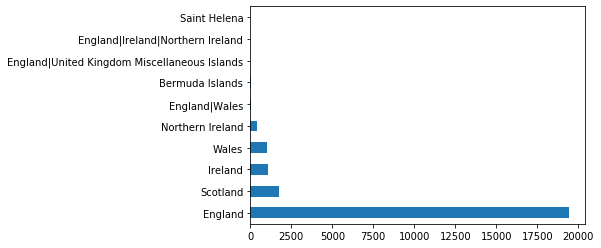

In [227]:
place_counts[:10].plot.barh()

We can already see that we'd need to do some filtering if we wanted to group together the different places.

# Saving output 
No we've filtered out London we want to share the filtered version back to our researcher. We can do this very easily:

In [226]:
df_no_london.to_csv('no_london.csv')

# fin 

This was a very quick tour through Pandas. The aim wasn't to show you everything or give a proper introduction but to try and show you how getting a good grasp on some basic Python concepts quite quickly can extend to doing more complex things. Building confidence in experimenting and debugging will be massively useful to making progress in Python. In particular trying to adapt other peoples notebooks can often get you very far if you only want to change a few things. As an example we could adapt what we have done inn this notebook to filter out only titles published in Scotland or Wales. 